In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

In [3]:
lambda_list=['1', '5e-1', '1e-1', '5e-2', '1e-2', '5e-3', '1e-3']

In [4]:
def get_test_loss(solver):
    data_frames = []
    for l2 in lambda_list:
        log = 'matlab-log/'+"sol_"+ solver +'_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv'
        df = pd.read_csv(log)
        df = df[["iter", "test_loss"]]
        df = df.rename(columns = {'test_loss': l2})
        data_frames.append(df)
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)
def get_obj(solver):
    data_frames = []
    for l2 in lambda_list:
        log = 'matlab-log/'+"sol_"+ solver +'_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv'
        df = pd.read_csv(log)
        df = df[["iter", "obj"]]
        df = df.rename(columns = {"obj": l2})
        data_frames.append(df)
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)

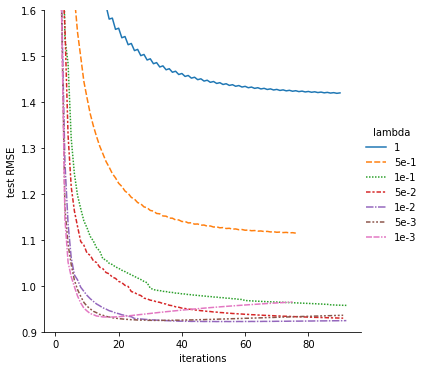

In [11]:
data = get_test_loss('0')
data = data.melt(id_vars="iter", var_name="lambda", value_name="RMSE")
g = sns.relplot(x="iter", y="RMSE", kind="line", hue="lambda", style="lambda", dashes=True, data=data)
g.ax.set(ylim=(0.9,1.6), xlabel="iterations", ylabel="test RMSE")
g.savefig("fig/fig1-5e-1-RMSE.png")

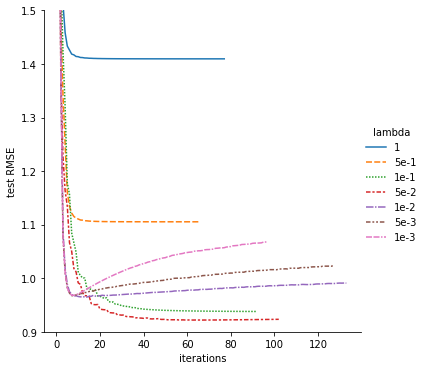

In [13]:
data = get_test_loss('1')
data = data.melt(id_vars="iter", var_name="lambda", value_name="RMSE")
g = sns.relplot(x="iter", y="RMSE", kind="line", hue="lambda", style="lambda", dashes=True, data=data)
g.ax.set(ylim=(0.9,1.5), xlabel="iterations", ylabel="test RMSE")
g.savefig("fig/fig1-5e-1-RMSE.png")